This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset:
df=pd.read_csv('C:/Users/Azhar1/Documents/FlipRobo/Project_Evaluation/Project_Phase 3/census_income.csv')

# Exploratory Data Analysis

In [4]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [5]:
df.shape

(32560, 15)

The dimension of our data is 32560 rows * 15 columns

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

1. We can see that 6 columns are integer datatype and 9 columns are having datatype as object.
2. Object datatypes are to be converted into interger in the later steps.

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
#printing the unique values available in the dataset

for i in df.columns:
    print(df[i].value_counts())
    print('*'*75)

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
***************************************************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
***************************************************************************
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
***************************************************************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th  

We can see that question marks are there in three columns i.e, Occupation, work class and Native country. We will replace them with mode values now.

In [11]:
#checking the number of null values present in each columns 

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We can see that there are no null values in our dataset.

In [12]:
# Changing question mark in our data

df['Workclass'] = df['Workclass'].replace(' ?', ' Private')
df['Occupation'] = df['Occupation'].replace(' ?',' Prof-specialty' )
df['Native_country'] = df['Native_country'].replace(' ?', ' United-States')


In [13]:
# Verifying that question mark is no more in the dataset
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [14]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [15]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

We can see that question mark is removed from the dataset and is now replaced by the mode values in the respective columns.

# Data Visualization

<Axes: >

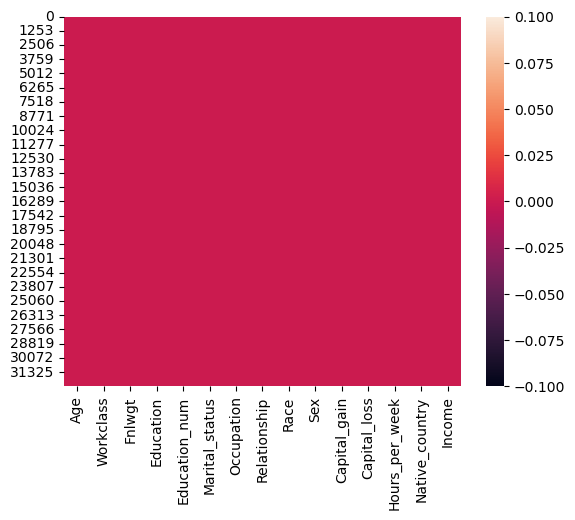

In [17]:
#Checking for null values

sns.heatmap(df.isnull())

No null values are shown graphically.

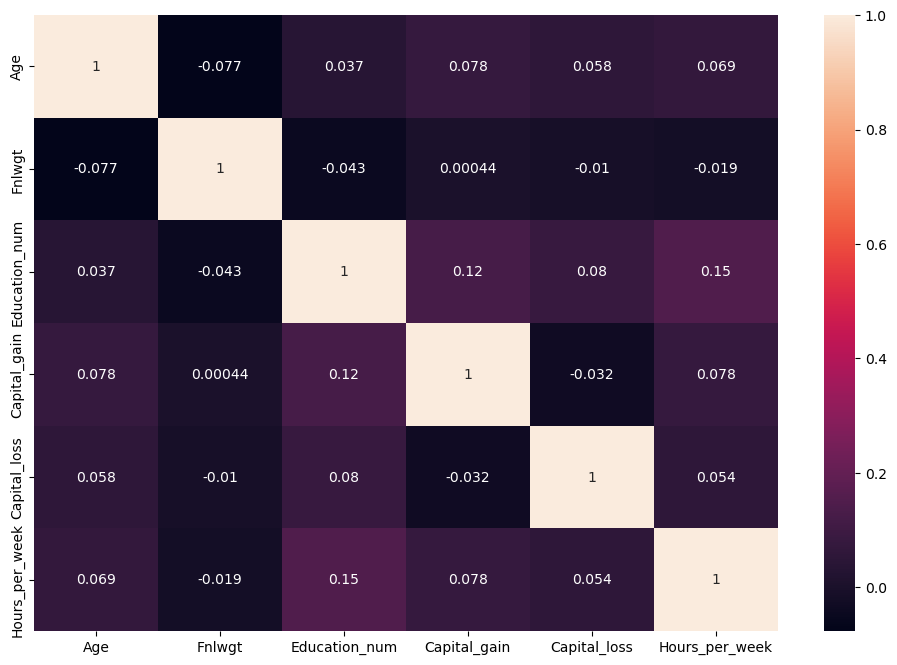

In [24]:
#Showing the attributes are related to each other can be seen by plotting the heatmap over the attributes correlation value
corr = df.corr()
plt.figure(figsize=(12,8), facecolor='white')
sns.heatmap(corr, annot=True)
plt.show()

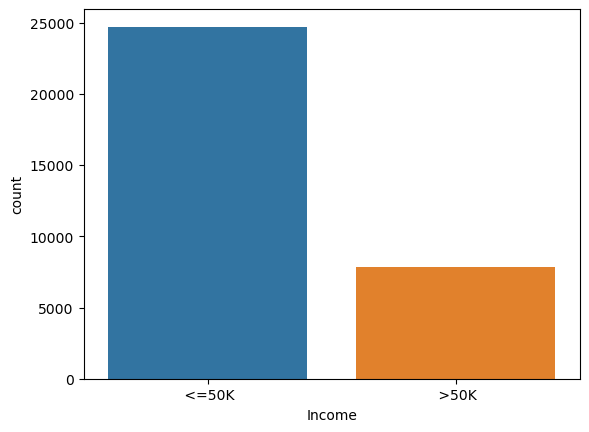

In [26]:
sns.countplot(df, x="Income")
plt.show()

We can see that less-than equal to 50K is having more count than the other. This has to be made equal for better model building in further steps.

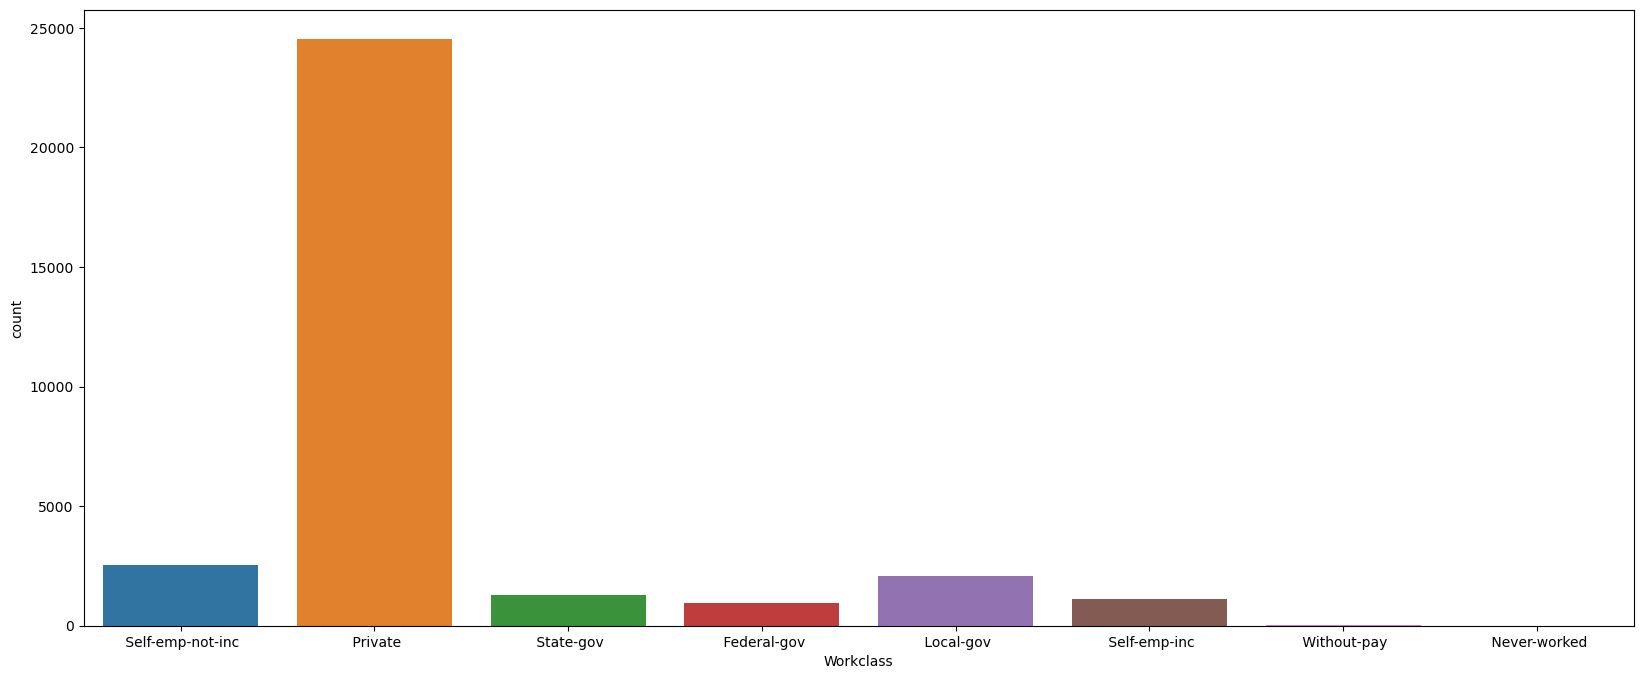

In [29]:
plt.figure(figsize = (20,8))
sns.countplot(df, x="Workclass")
plt.show()

We can observe that most of the employees are in private sector.

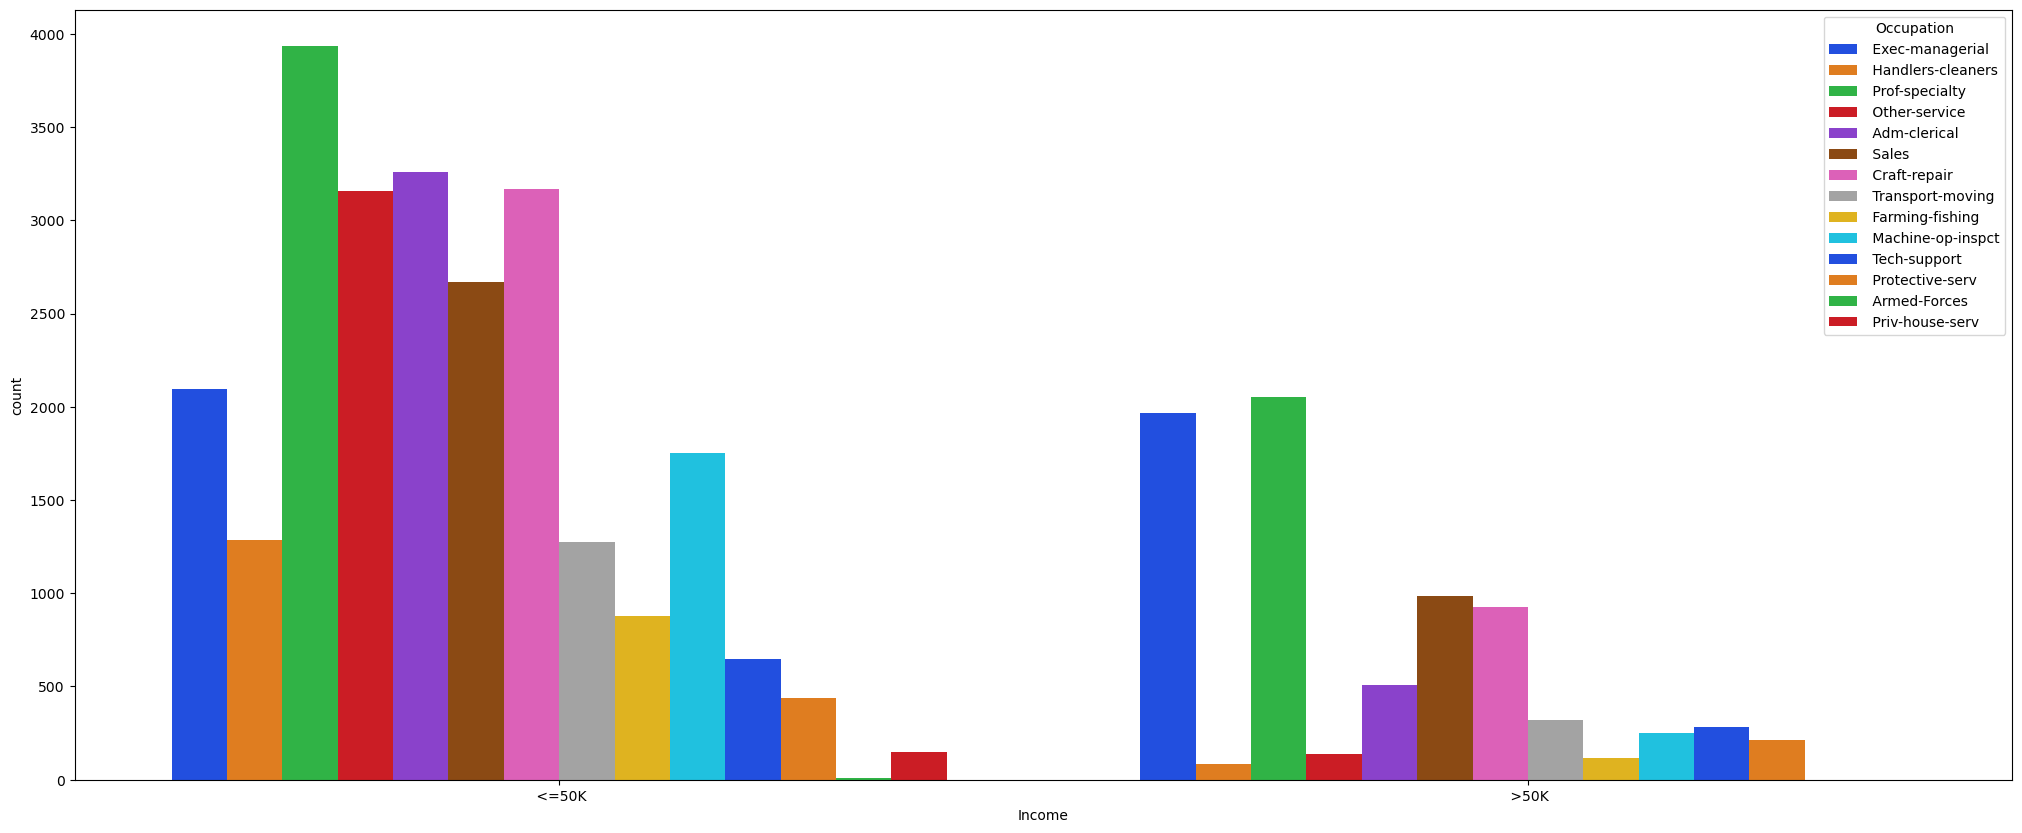

In [33]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'Income', hue = 'Occupation', data = df, palette="bright")
plt.show()

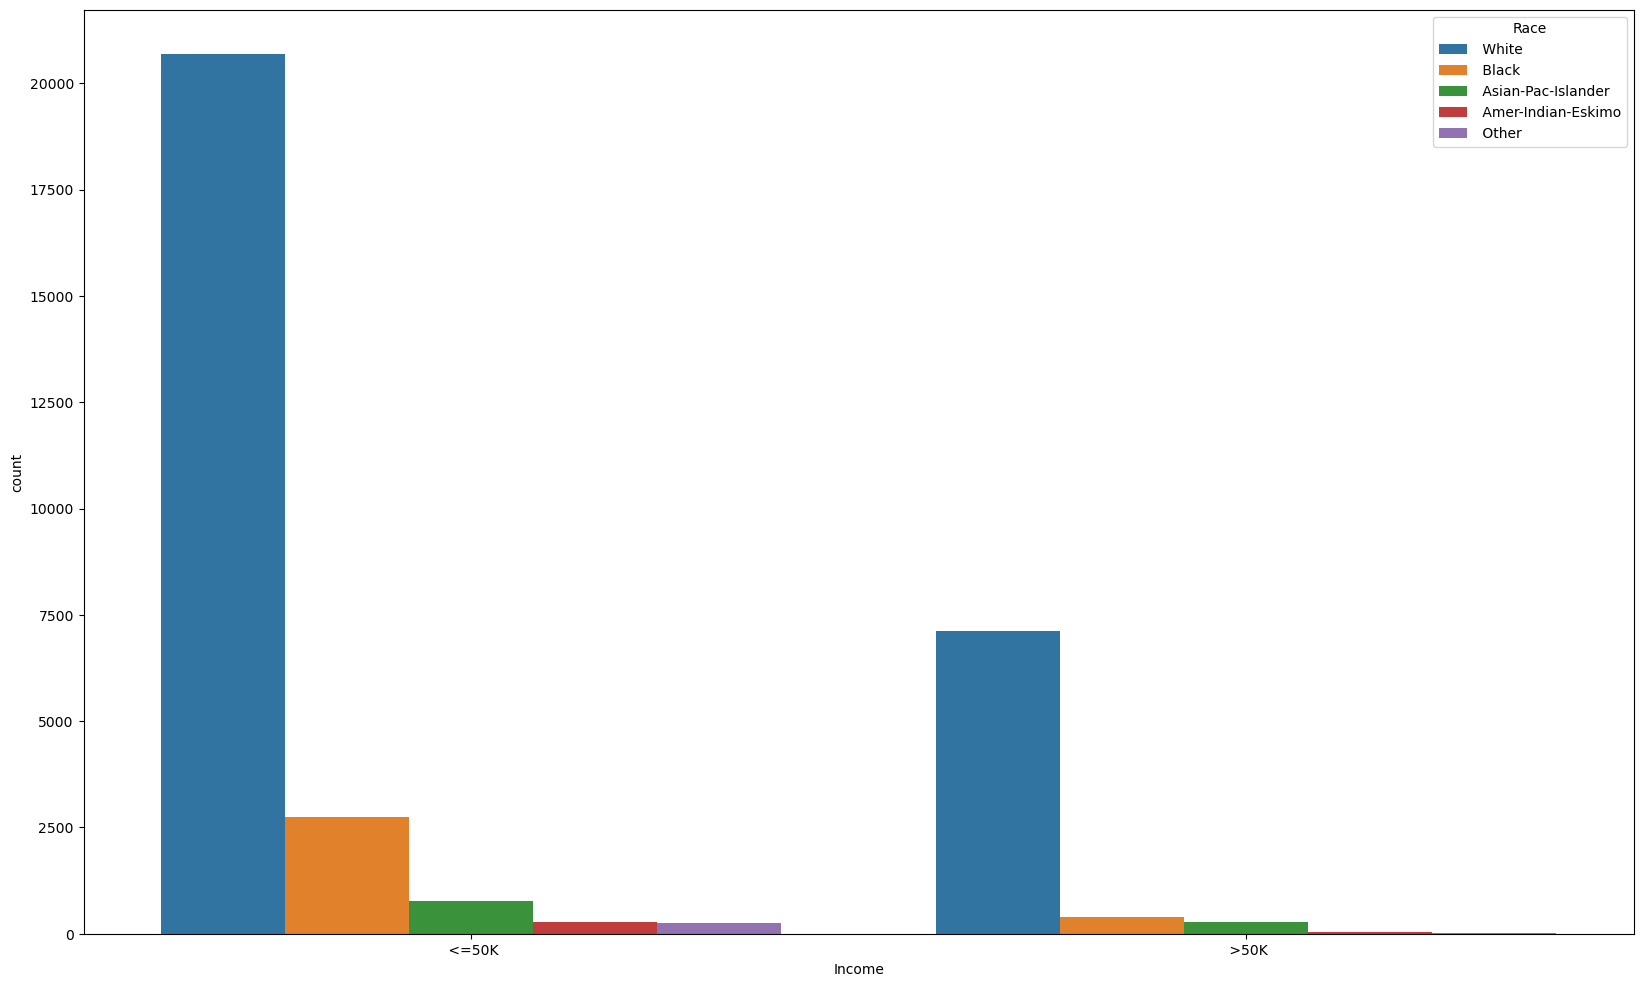

In [34]:
plt.figure(figsize = (20,12))
sns.countplot(x = 'Income', hue = 'Race', data = df, saturation=0.75)

plt.show()

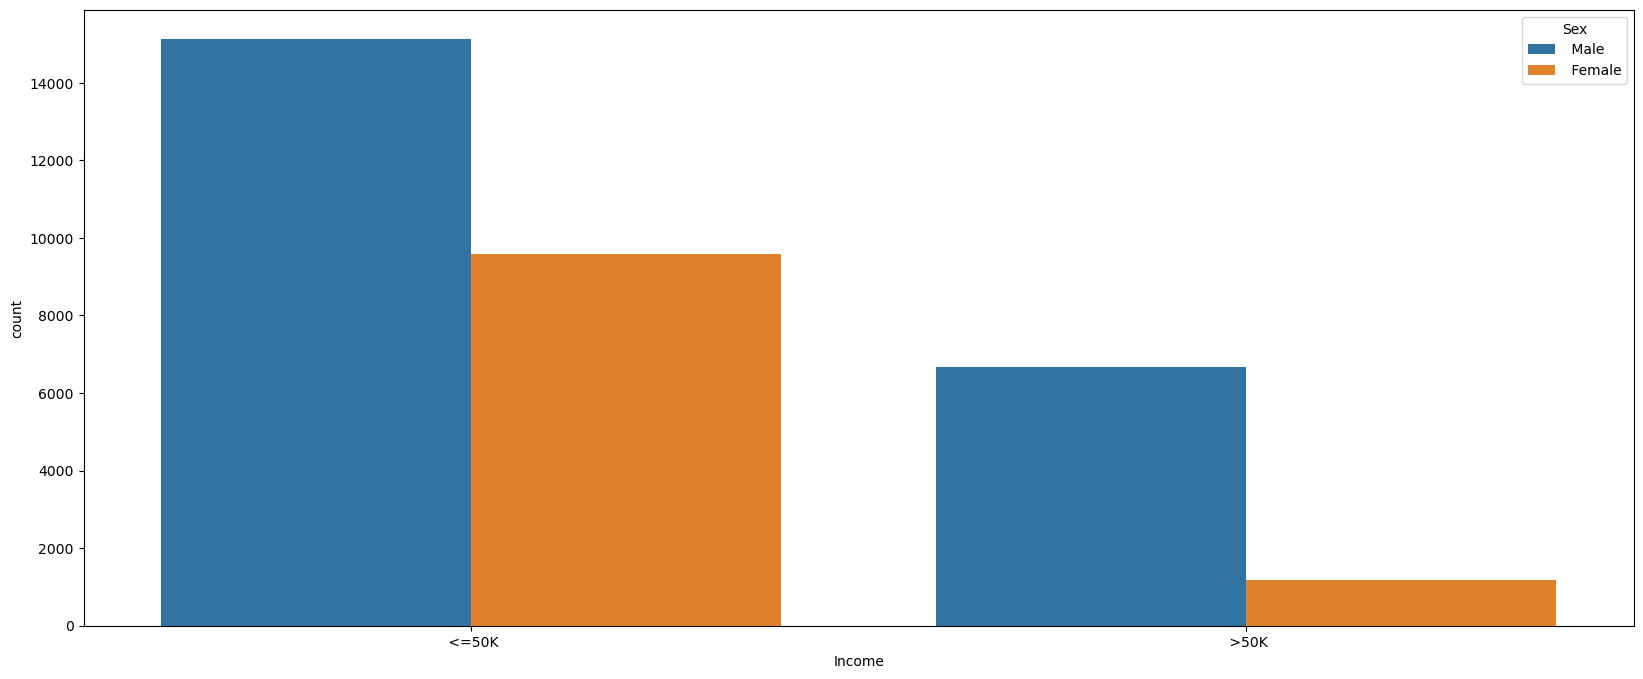

In [36]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'Income', hue = 'Sex', data = df, saturation=0.75)
plt.show()

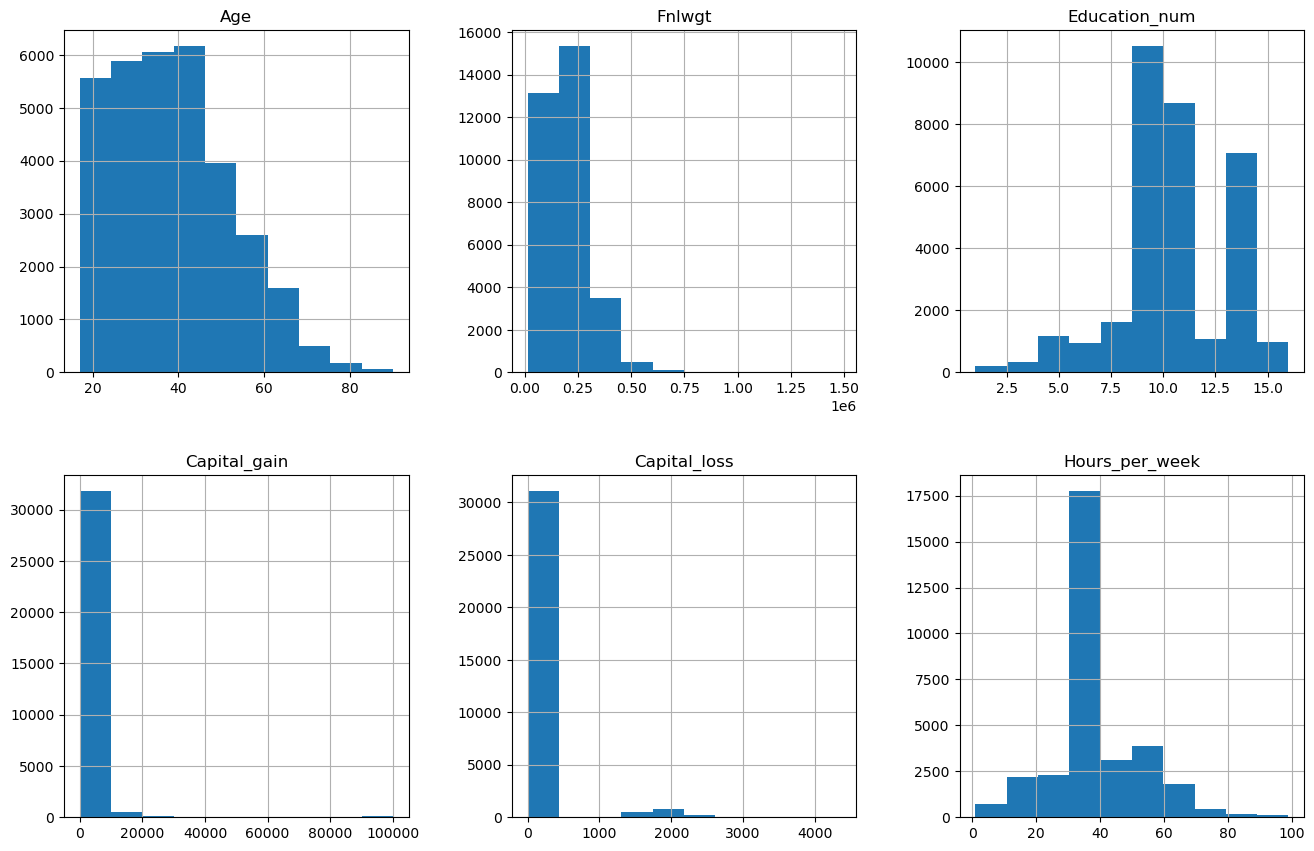

In [37]:
df.hist(figsize = (16,16), layout = (3,3))
plt.show()

1. Age is highly distributed between 20-50
2. Fnlwt is whighly ditrubuted between 0 to 0.5
3. More number more number of people working for 30- 30 HRs per week

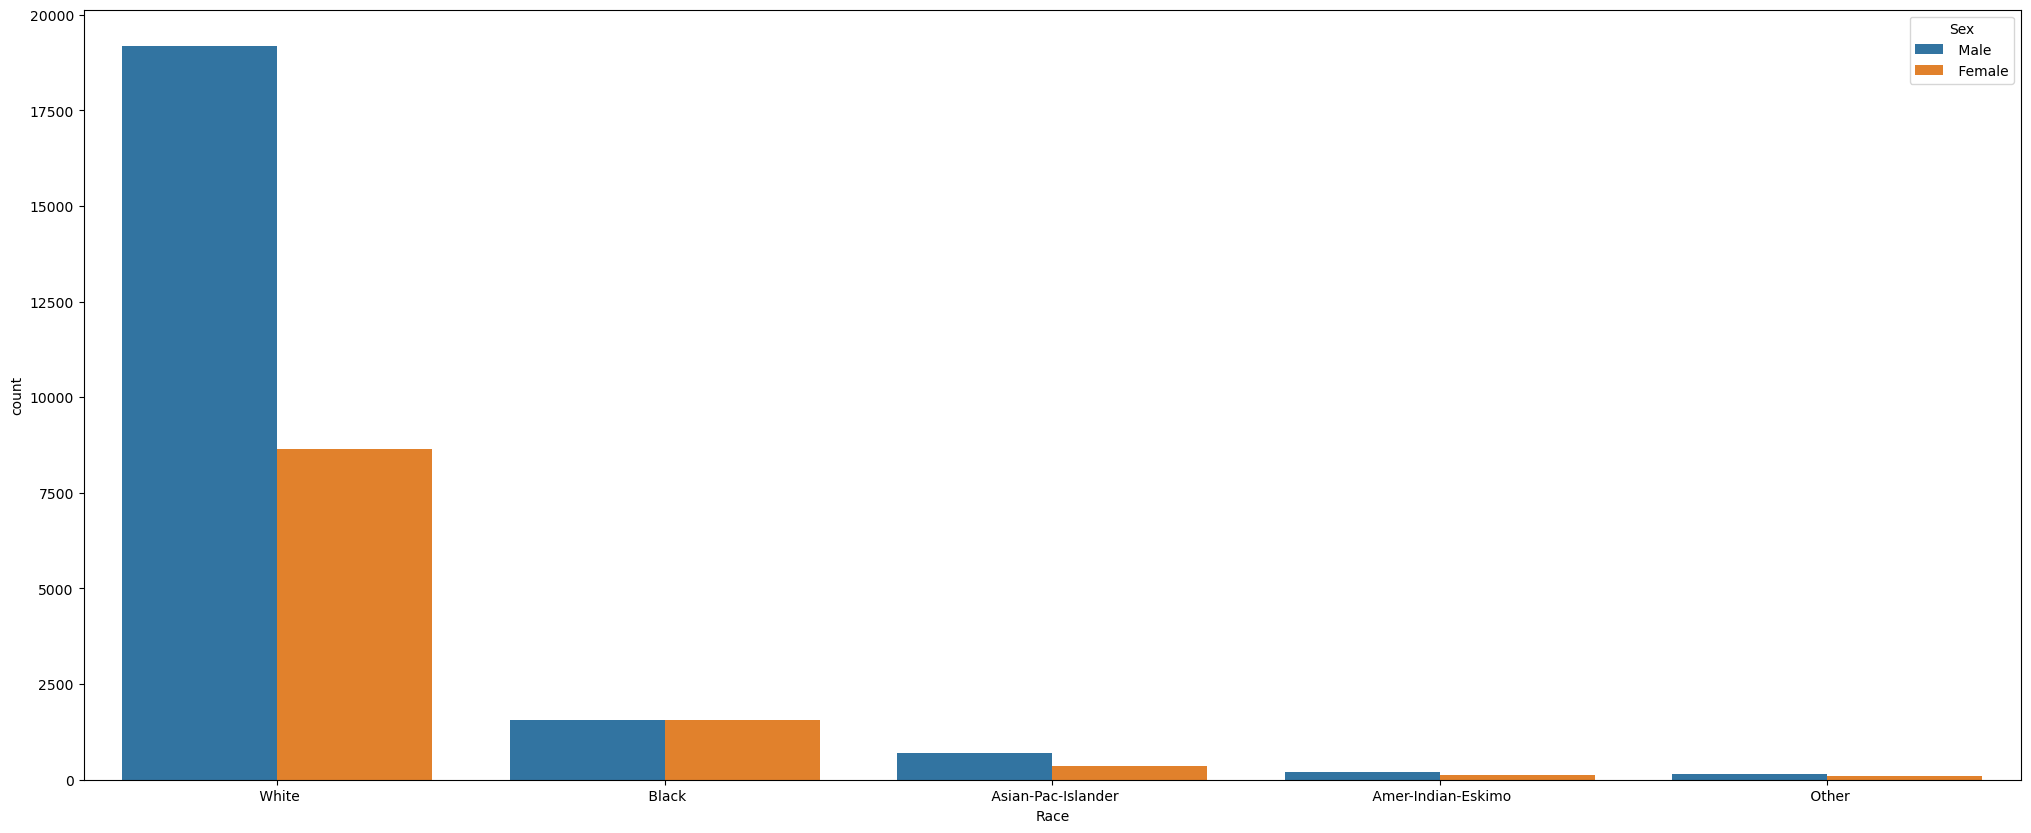

In [38]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'Race', hue = 'Sex', data = df, saturation=0.75)
plt.show()

In [39]:
df.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [41]:
# Segregating unique values in Education 

df['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th',' 10th', ' 1st-4th', ' 12th' ], 'school', inplace = True)
df['Education'].replace([' Assoc-acdm', ' Assoc-voc',' Prof-school',' Some-college'], 'Highchool', inplace = True)

In [43]:
df.Education.unique()

array([' Bachelors', ' HS-grad', 'school', ' Masters', 'Highchool',
       ' Doctorate', ' Preschool'], dtype=object)

In [45]:
# Using Label endcoder to convert all categorical columns into Integer datatype

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df['Workclass'] = LE.fit_transform(df['Workclass'])
df['Education'] = LE.fit_transform(df['Education'])
df['Marital_status'] = LE.fit_transform(df['Marital_status'])
df['Occupation'] = LE.fit_transform(df['Occupation'])
df['Relationship'] = LE.fit_transform(df['Relationship'])
df['Race'] = LE.fit_transform(df['Race'])
df['Sex'] = LE.fit_transform(df['Sex'])
df['Native_country'] = LE.fit_transform(df['Native_country'])
df['Income'] = LE.fit_transform(df['Income'])

In [47]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

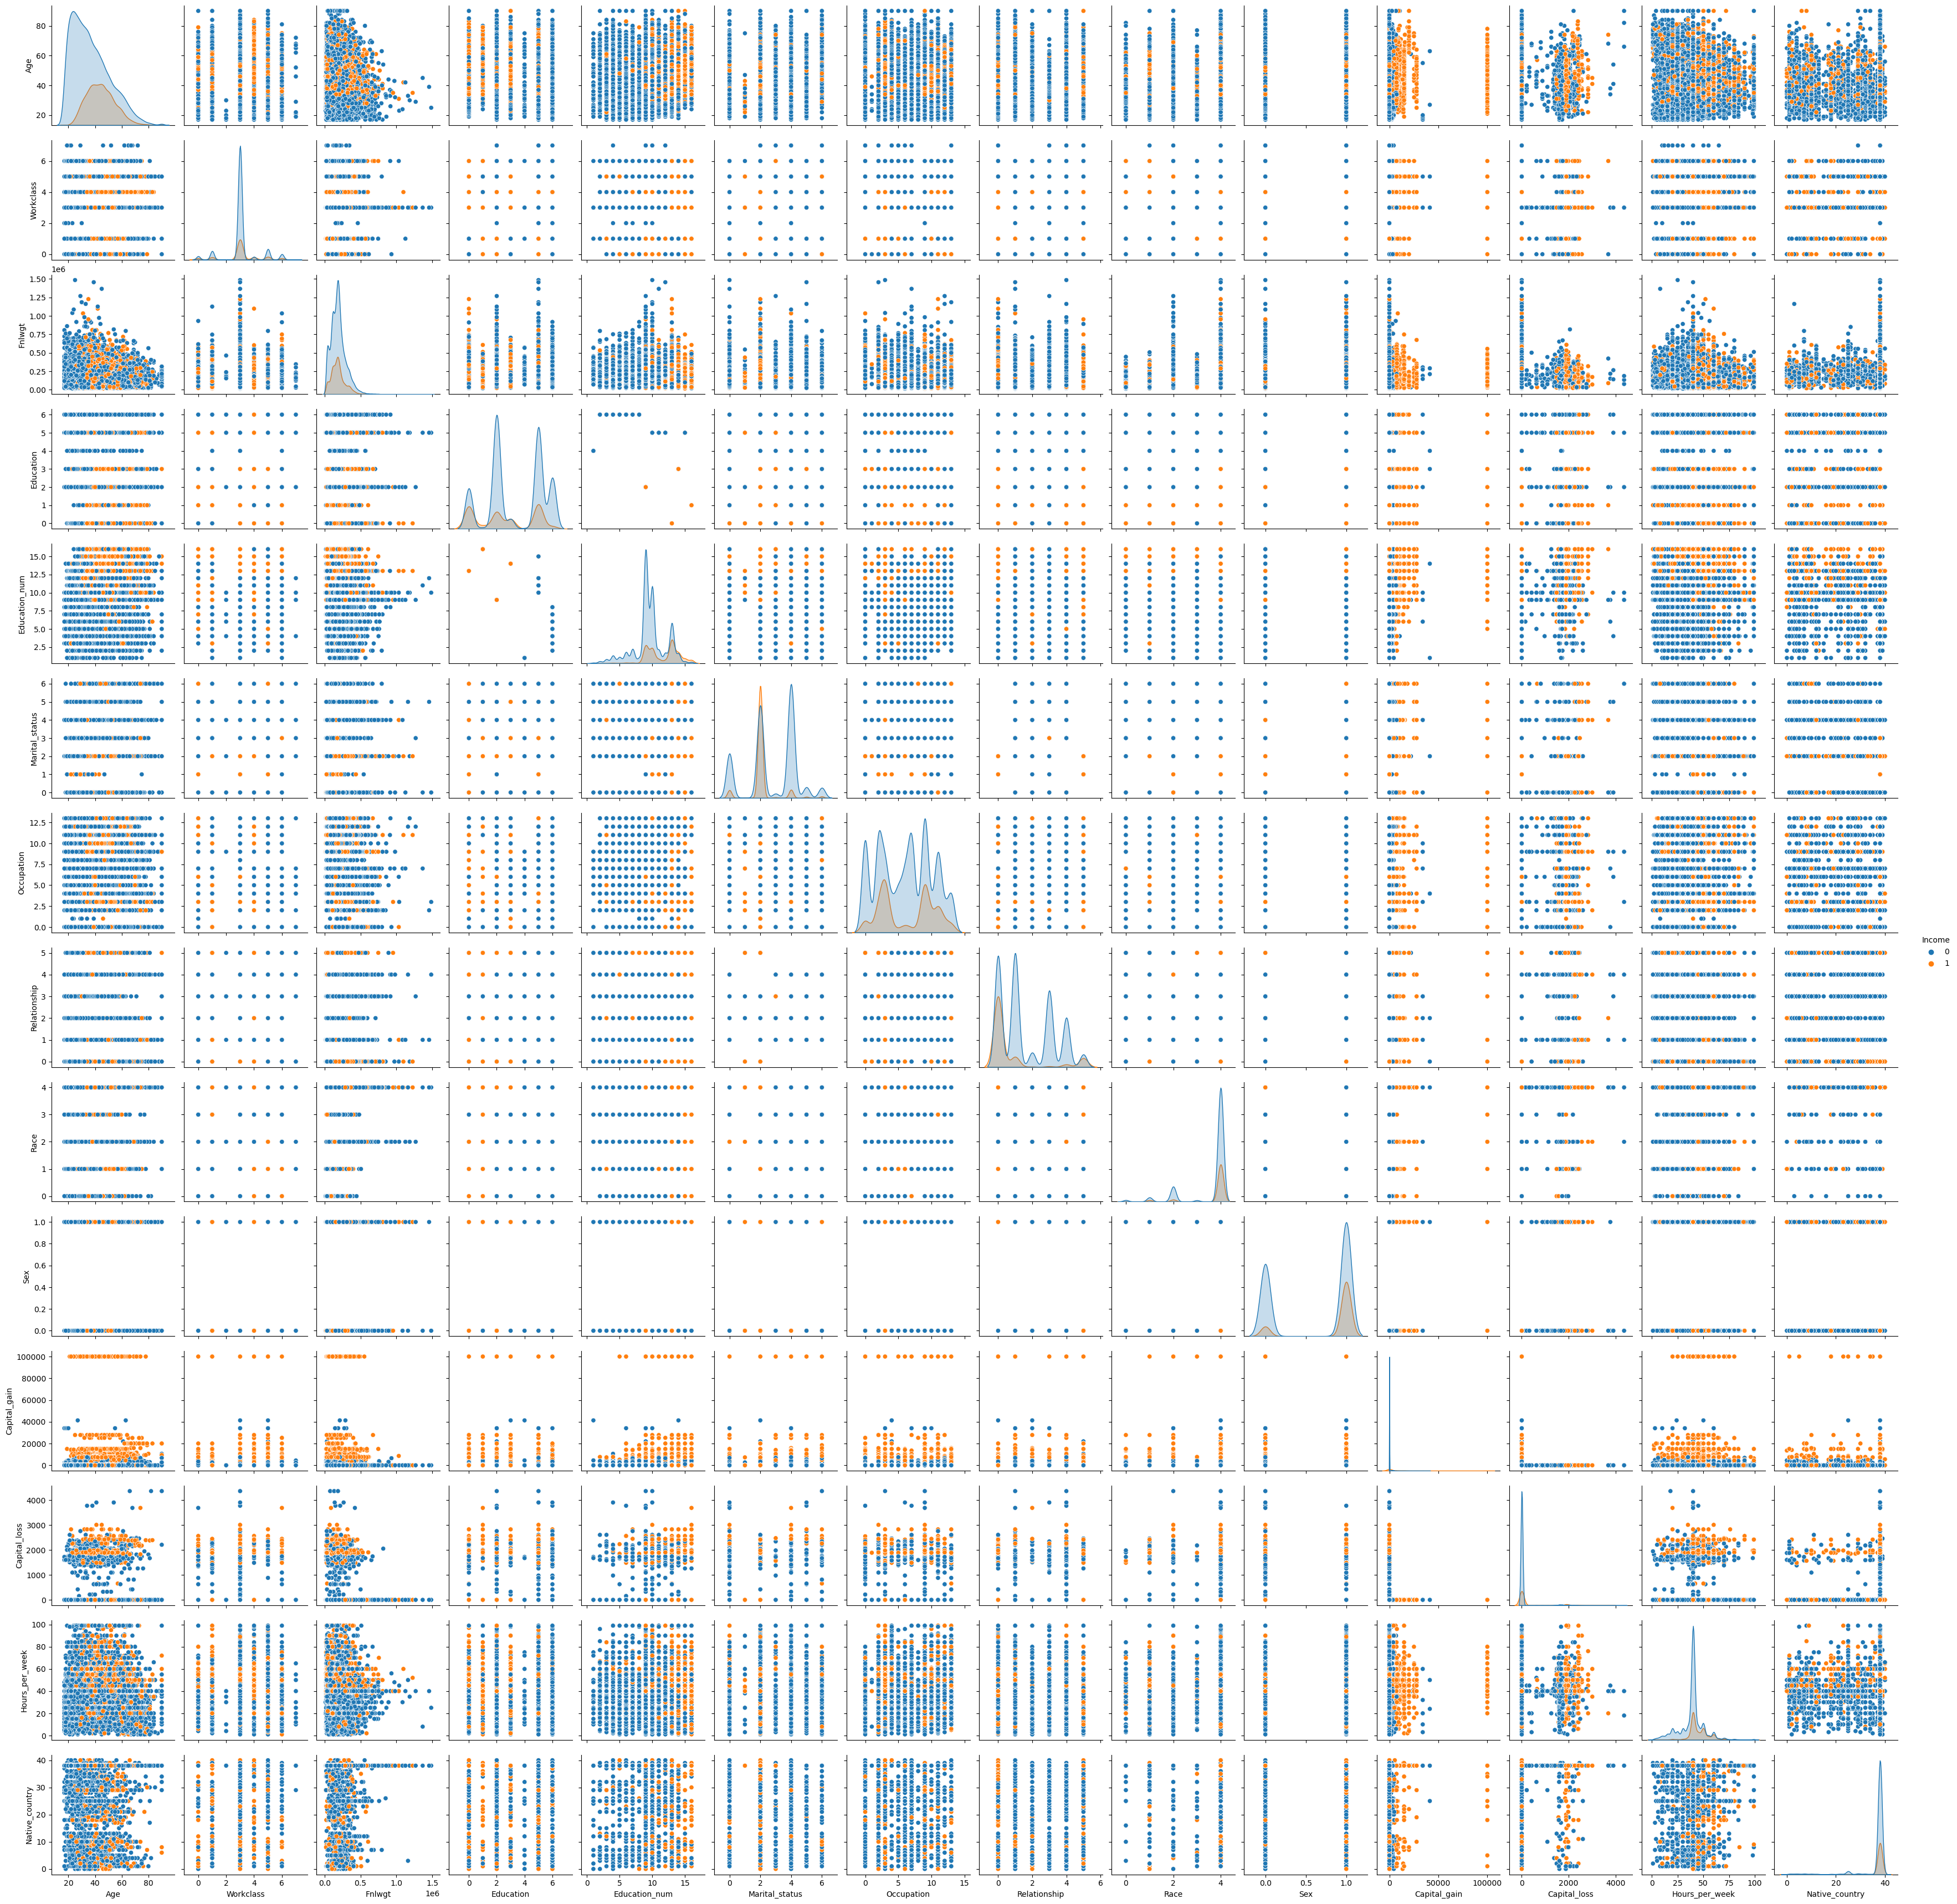

In [49]:
sns.pairplot(data=df, hue='Income')

# Finding Best Random State

In [50]:
# Dividing into Feature and Target data
x=df.drop(['Income'],axis=1)
y=df['Income']

In [51]:
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state= i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is ',maxAccu,'at random state ',maxRS)

Best Accuracy is  0.8058968058968059 at random state  35


# Balancing the dataset


In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
X,Y=SMOTE(k_neighbors=3).fit_resample(x,y)

In [54]:
X.shape

(49438, 14)

In [55]:
Y.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

In [57]:
dfa=pd.DataFrame(data=X,columns=['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country'])

In [58]:
x=dfa
y=Y

In [59]:
x.shape

(49438, 14)

In [60]:
y.shape

(49438,)

# Training & Testing of Data

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=35)

# Applying various models

In [62]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_auc_score,precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predlg),'%')

for i in range(2,10):
    cvs = cross_val_score(lg,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predlg))
print('\n Classification Report: \n',classification_report(y_test,predlg))

Accuracy score is:  0.6161003236245954 %
Cross Validation Score for cv= 2 is 0.6706379707916987
Cross Validation Score for cv= 3 is 0.6711030806394566
Cross Validation Score for cv= 4 is 0.6587043173862005
Cross Validation Score for cv= 5 is 0.6529594899713036
Cross Validation Score for cv= 6 is 0.6473966097191077
Cross Validation Score for cv= 7 is 0.6718320881261625
Cross Validation Score for cv= 8 is 0.6769892614403834
Cross Validation Score for cv= 9 is 0.6453947716301942

 Confusion Matrix: 
 [[6882  491]
 [5203 2256]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.93      0.71      7373
           1       0.82      0.30      0.44      7459

    accuracy                           0.62     14832
   macro avg       0.70      0.62      0.57     14832
weighted avg       0.70      0.62      0.57     14832



In [68]:
# Using SVC model:

from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predsvc),'%')

for i in range(2,5):
    cvs = cross_val_score(svc,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predsvc))
print('\n Classification Report: \n',classification_report(y_test,predsvc))

Accuracy score is:  0.5863673139158576 %
Cross Validation Score for cv= 2 is 0.5910028722844776
Cross Validation Score for cv= 3 is 0.5912051434590381
Cross Validation Score for cv= 4 is 0.591488337966829

 Confusion Matrix: 
 [[7255  118]
 [6017 1442]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.98      0.70      7373
           1       0.92      0.19      0.32      7459

    accuracy                           0.59     14832
   macro avg       0.74      0.59      0.51     14832
weighted avg       0.74      0.59      0.51     14832



In [69]:
# Using KNN model:

from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predkn),'%')

for i in range(2,5):
    cvs = cross_val_score(kn,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predkn))
print('\n Classification Report: \n',classification_report(y_test,predkn))

Accuracy score is:  0.7290318230852212 %
Cross Validation Score for cv= 2 is 0.7172013430964035
Cross Validation Score for cv= 3 is 0.7383594050562735
Cross Validation Score for cv= 4 is 0.7409486974234413

 Confusion Matrix: 
 [[4881 2492]
 [1527 5932]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.66      0.71      7373
           1       0.70      0.80      0.75      7459

    accuracy                           0.73     14832
   macro avg       0.73      0.73      0.73     14832
weighted avg       0.73      0.73      0.73     14832



In [70]:
# Using Decision Tree model:

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,preddtc),'%')

for i in range(2,5):
    cvs = cross_val_score(dtc,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,preddtc))
print('\n Classification Report: \n',classification_report(y_test,preddtc))

Accuracy score is:  0.8485706580366774 %
Cross Validation Score for cv= 2 is 0.8262874711760184
Cross Validation Score for cv= 3 is 0.8288587296355016
Cross Validation Score for cv= 4 is 0.8452828716989127

 Confusion Matrix: 
 [[6259 1114]
 [1132 6327]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      7373
           1       0.85      0.85      0.85      7459

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832



In [71]:
# Using Random Forest classifier:

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predRF),'%')

for i in range(2,5):
    cvs = cross_val_score(RF,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predRF))
print('\n Classification Report: \n',classification_report(y_test,predRF))

Accuracy score is:  0.8930016181229773 %
Cross Validation Score for cv= 2 is 0.8607346575508719
Cross Validation Score for cv= 3 is 0.8608181276513346
Cross Validation Score for cv= 4 is 0.8793458758485032

 Confusion Matrix: 
 [[6607  766]
 [ 821 6638]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      7373
           1       0.90      0.89      0.89      7459

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



In [72]:
# Using AdaBoost classifier:

from sklearn.ensemble import AdaBoostClassifier
Ad=AdaBoostClassifier()
Ad.fit(x_train,y_train)
predAd=Ad.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predAd),'%')

for i in range(2,5):
    cvs = cross_val_score(Ad,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predAd))
print('\n Classification Report: \n',classification_report(y_test,predAd))

Accuracy score is:  0.8592233009708737 %
Cross Validation Score for cv= 2 is 0.8387070674380032
Cross Validation Score for cv= 3 is 0.8394975997695213
Cross Validation Score for cv= 4 is 0.8525033428857447

 Confusion Matrix: 
 [[6176 1197]
 [ 891 6568]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      7373
           1       0.85      0.88      0.86      7459

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



In [73]:
# Using GuasianNB classifier:

from sklearn.naive_bayes import GaussianNB
Gu=GaussianNB()
Gu.fit(x_train,y_train)
predGu=Gu.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predGu),'%')

for i in range(2,5):
    cvs = cross_val_score(Gu,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predGu))
print('\n Classification Report: \n',classification_report(y_test,predGu))

Accuracy score is:  0.622168284789644 %
Cross Validation Score for cv= 2 is 0.6255107407257575
Cross Validation Score for cv= 3 is 0.6256320832771178
Cross Validation Score for cv= 4 is 0.6255714049952722

 Confusion Matrix: 
 [[6979  394]
 [5210 2249]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.95      0.71      7373
           1       0.85      0.30      0.45      7459

    accuracy                           0.62     14832
   macro avg       0.71      0.62      0.58     14832
weighted avg       0.71      0.62      0.58     14832



In [74]:
# Using XG Booster:

from xgboost import XGBClassifier
XG=XGBClassifier()
XG.fit(x_train,y_train)
predXG=XG.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predXG),'%')

for i in range(2,5):
    cvs = cross_val_score(XG,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predXG))
print('\n Classification Report: \n',classification_report(y_test,predXG))

Accuracy score is:  0.8969120819848975 %
Cross Validation Score for cv= 2 is 0.8488005178203002
Cross Validation Score for cv= 3 is 0.8506038736463845
Cross Validation Score for cv= 4 is 0.8788605567893214

 Confusion Matrix: 
 [[6650  723]
 [ 806 6653]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      7373
           1       0.90      0.89      0.90      7459

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832



# After several model performances, Random Forest Classifier has the best accuracy score of 89.30 % with CV score of 87.93%

# Hyperparameter tuning the model

In [77]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_features':['auto','sqrt','log'],
             'max_depth':[4,5,6,7,8,9,12,14],
              'min_samples_split':[1,2,4,5,6,8],
             'criterion':['gini','entropy']}

In [78]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5, scoring='accuracy')
GCV.fit(x_train,y_train)

GCV.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'sqrt',
 'min_samples_split': 4}

In [82]:
GCV_pred = GCV.best_estimator_.predict(x_test) # predicting with best parameters
print('Accuracy',accuracy_score(y_test,GCV_pred)*100)
print(confusion_matrix(y_test,GCV_pred))
print(classification_report(y_test,GCV_pred))

Accuracy 88.46413160733549
[[6469  904]
 [ 807 6652]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7373
           1       0.88      0.89      0.89      7459

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832



# AUC ROC Curve:

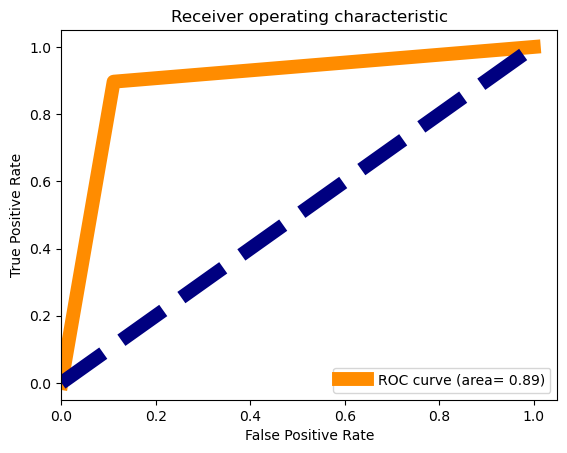

In [84]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(predRF, y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Saving the model

In [85]:
import joblib
joblib.dump(RF,'Project_Census Income.pkl')

['Project_Census Income.pkl']

# Predicting the saved model

In [86]:
import numpy as np
a=np.array(y_test)
predicted= np.array(RF.predict(x_test))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

original  predicted
0             1          1
1             0          0
2             1          1
3             0          0
4             1          1
...         ...        ...
14827         1          1
14828         1          0
14829         0          1
14830         1          1
14831         1          1

[14832 rows x 2 columns]